In [1]:
#from typing import Dict, Tuple, List
#from pathlib import Path
#
#import numpy as np
#import pandas as pd

#from numpy.testing import assert_equal, assert_allclose
from typing import Dict, Tuple, List
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#does intensity affect time to sleep and time slept?

In [3]:
#pd.read_csv("data/babynames/names2000_2021.csv", index_col=0)
minuteCaloriesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteSleep = pd.read_csv("Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday = pd.read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
dailyCalories = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
weightLog = pd.read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# Factors affecting time to fall asleep and time slept?

Investigate whether the amount of calories burnt or active minutes affect the time required to fall asleep and time slept.
## i) Calories 

In [21]:
#does daily calories affect time required to fall asleep?
#function merging dailyCalories and sleepday datasets
def merge_dailyCal_sleepDay(dailyCalories: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyCalories,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

In [22]:
merge_dailyCal_sleepDay(dailyCalories, sleepday)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDay,Calories,CalorieInterval,TimeToFallAsleep
0,1503960366,2016-04-12,1,327,346,4/12/2016,4/12/2016,1985,1501-2000,19
1,1503960366,2016-04-13,2,384,407,4/13/2016,4/13/2016,1797,1501-2000,23
2,1503960366,2016-04-15,1,412,442,4/15/2016,4/15/2016,1745,1501-2000,30
3,1503960366,2016-04-16,2,340,367,4/16/2016,4/16/2016,1863,1501-2000,27
4,1503960366,2016-04-17,1,700,712,4/17/2016,4/17/2016,1728,1501-2000,12
...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,1,343,360,4/30/2016,4/30/2016,2896,2501-3000,17
409,8792009665,2016-05-01,1,503,527,5/1/2016,5/1/2016,1962,1501-2000,24
410,8792009665,2016-05-02,1,415,423,5/2/2016,5/2/2016,2015,2001-2500,8
411,8792009665,2016-05-03,1,516,545,5/3/2016,5/3/2016,2297,2001-2500,29


In [6]:
def visualize_data(df):
    # Line plot of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Bar chart of calories vs. time to fall asleep
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Calories', y='TimeToFallAsleep')
    plt.title('Daily Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Scatter plot and regression line
    plt.figure(figsize=(12, 6))
    sns.regplot(data=df, x='Calories', y='TimeToFallAsleep', scatter_kws={'alpha':0.5})
    plt.title('Regression Analysis: Calories vs. Time to Fall Asleep')
    plt.xlabel('Calories')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()
    
    # Regression analysis
    X = df['Calories'].values.reshape(-1, 1)
    y = df['TimeToFallAsleep'].values
    regression = LinearRegression()
    regression.fit(X, y)
    y_pred = regression.predict(X)
    
    print('Regression Coefficient:', regression.coef_)
    print('Intercept:', regression.intercept_)
    print('R^2 score:', regression.score(X, y))


In [7]:
def plot_calorie_intervals_frequency(dailyCalories: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    dailyCalories['CalorieInterval'] = pd.cut(dailyCalories['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a bar chart of the frequency of each interval
    plt.figure(figsize=(10, 6))
    bar_plot = sns.countplot(data=dailyCalories, x='CalorieInterval')
    plt.title('Frequency of Daily Calories in Different Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Frequency')

    # Add total frequency labels on top of each bar
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height}', 
                          (p.get_x() + p.get_width() / 2., height), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 5), 
                          textcoords = 'offset points')

    plt.show()

def plot_calorie_intervals_avg_sleep(df: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)
    
    # Calculate the average time to fall asleep for each interval
    avg_sleep = df.groupby('CalorieInterval')['TimeToFallAsleep'].mean().reset_index()
    
    # Create a bar chart of the average time to fall asleep
    plt.figure(figsize=(10, 6))
    sns.barplot(data=avg_sleep, x='CalorieInterval', y='TimeToFallAsleep')
    plt.title('Average Time to Fall Asleep in Different Calorie Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Average Time to Fall Asleep (minutes)')
    
    # Add average time labels on top of each bar
    for i in range(len(avg_sleep)):
        plt.text(i, avg_sleep['TimeToFallAsleep'][i] + 1, round(avg_sleep['TimeToFallAsleep'][i], 2), ha = 'center', va = 'bottom')

    plt.show()

def plot_box_calorie_intervals_avg_sleep(df: pd.DataFrame):
    # Define the calorie intervals
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
    labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', 
              '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000']
    
    # Categorize the 'Calories' into intervals
    df['CalorieInterval'] = pd.cut(df['Calories'], bins=bins, labels=labels, right=False)
    
    # Create a box plot for the average time to fall asleep in each interval
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='CalorieInterval', y='TimeToFallAsleep')
    plt.title('Box Plot of Time to Fall Asleep in Different Calorie Intervals')
    plt.xlabel('Calorie Interval')
    plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.show()


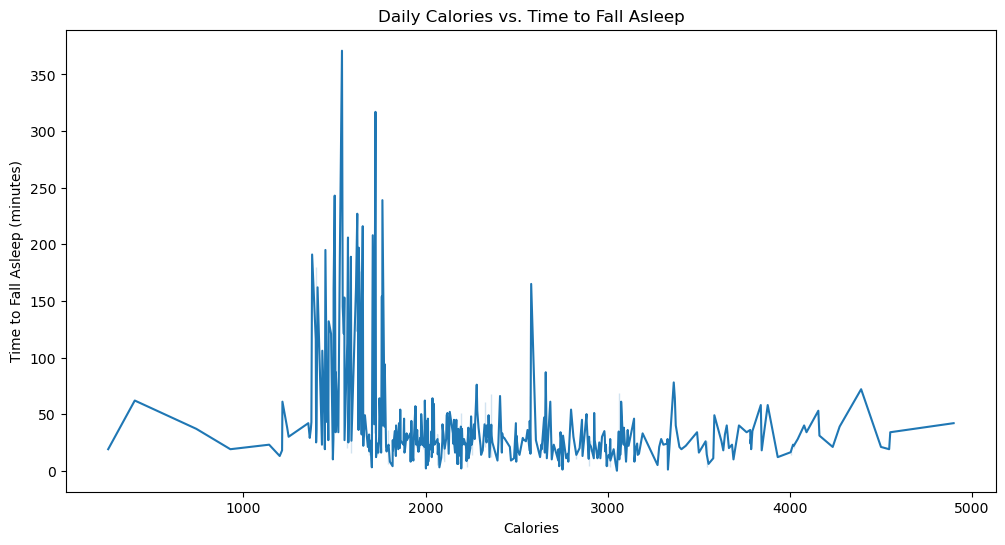

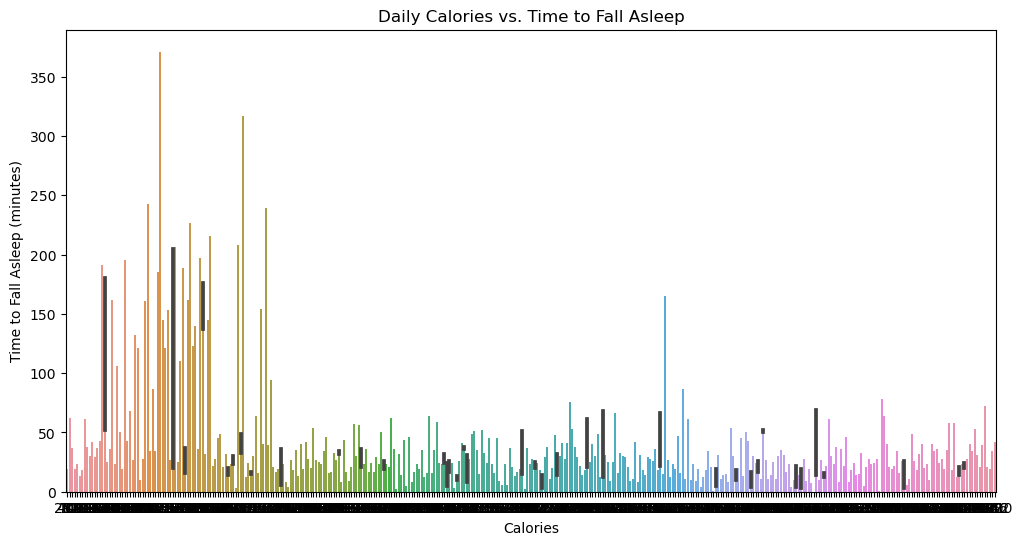

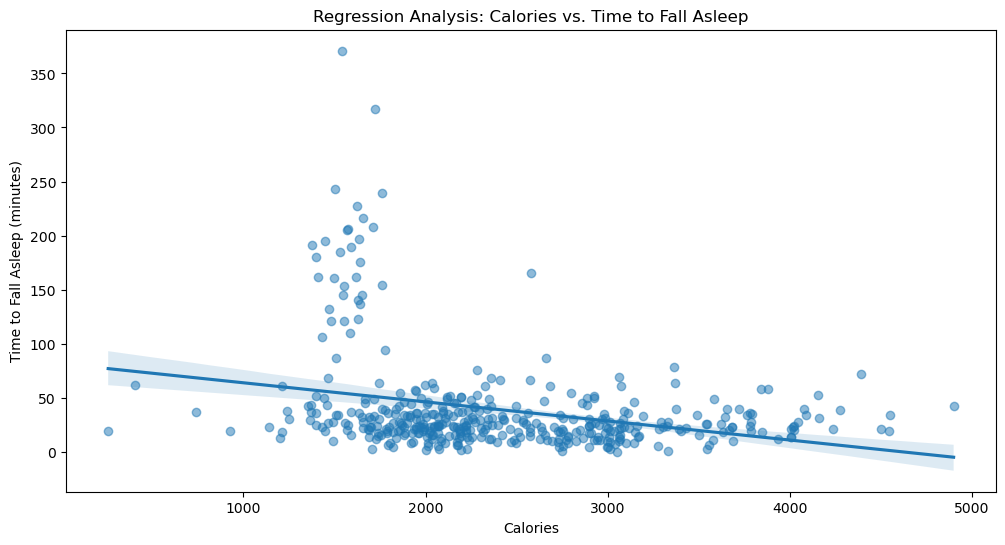

Regression Coefficient: [-0.01765138]
Intercept: 81.49240625201736
R^2 score: 0.08361089404548572


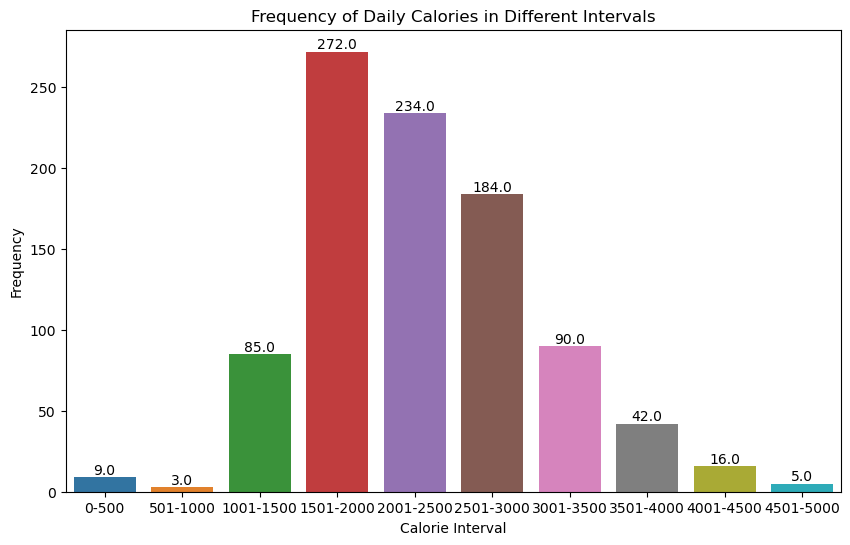

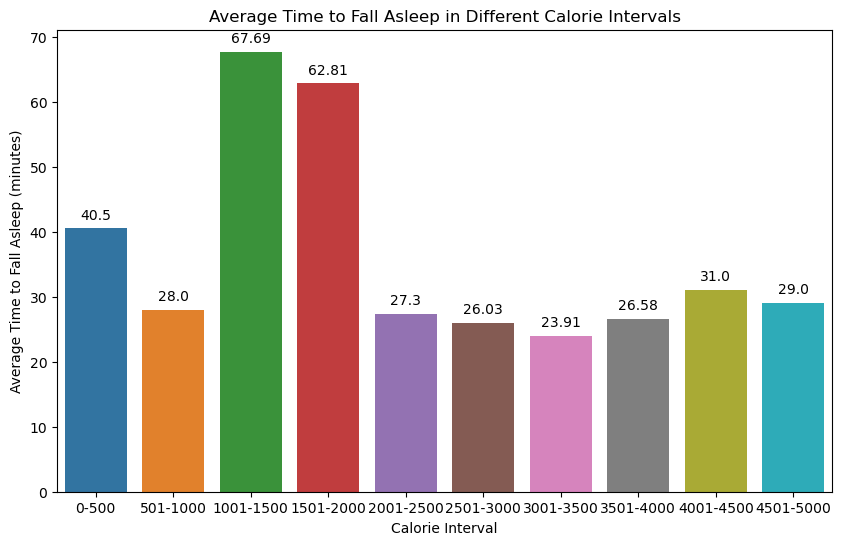

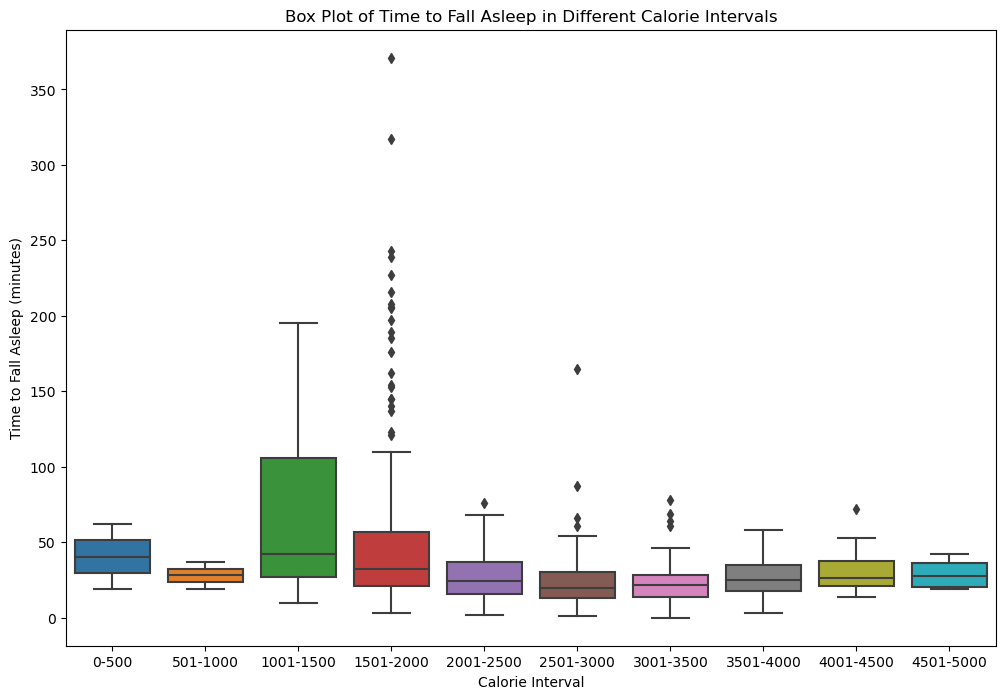

In [8]:
a = merge_dailyCal_sleepDay(dailyCalories, sleepday)
visualize_data(a)
plot_calorie_intervals_frequency(dailyCalories)
plot_calorie_intervals_avg_sleep(a)
plot_box_calorie_intervals_avg_sleep(a)


## ii) Does daily activity affect time required to fall asleep?

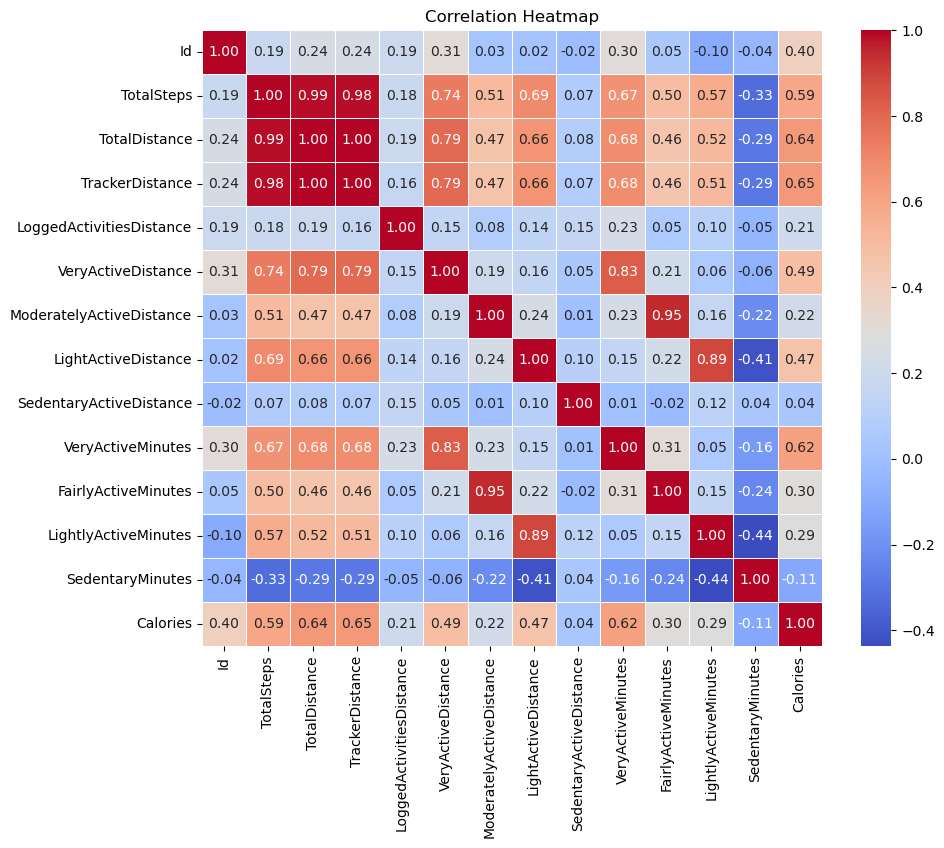

In [46]:
#correlation of the table daily Activities
def correlation(df):
    df_new = df.drop("ActivityDate",axis="columns")
    return df_new.corr()
    
def display_heatmap(df):
    corr_matrix = correlation(df)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
    plt.title('Correlation Heatmap')
    plt.show()
    
correlation(dailyActivity)
display_heatmap(dailyActivity)

In [47]:
#see how much do people proportion of high intensity do people usually do
#see if it is correlated to distance
#observe if relationship with bmi
#count for how many different people do we have bmi info and weight
#compare 

In [79]:
def proportion_of_active_distance(df: pd.DataFrame):
    #count distinct Id´s
    #for each Id, calculate average veryActiveMinutes,reairActiveMinutes,LightlyActive
    #https://stackoverflow.com/questions/73390091/pandas-calculate-the-average-of-the-same-data
    uniqueIds = df.Id.unique()
    df_new = df.drop("ActivityDate",axis="columns")
    listLightActiveMinutes = []
    listAvgSedentaryMin = []
    listAvgLightlyMin = []
    listAvgFairlyMin = []
    listAvgVeryMin = []
    df_means = df_new.groupby(["Id"]).mean().reset_index()
    #for i in uniqueIds:
        
    return df_means.describe()

proportion_of_active_distance(dailyActivity)


    
#get lowest 25% quantile and top 75%, look at how much time they slept and time required to fall asleep
#day of the week which people sleep more

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,4.857201e+09,7519.272678,5.398953,5.383618,0.110118,1.449551,0.557039,3.317450,0.001625,20.308769,13.260240,191.521291,999.151475,2282.443660
std,2.433765e+09,3576.340125,2.772293,2.759479,0.412496,1.866091,0.537638,1.375683,0.003020,23.803214,12.108217,75.689747,227.678526,562.761632
min,1.503960e+09,916.129032,0.634516,0.634516,0.000000,0.006129,0.011290,0.507097,0.000000,0.096774,0.258065,38.580645,662.322581,1483.354839
25%,2.347168e+09,5566.870968,3.454839,3.454839,0.000000,0.142258,0.128276,2.606774,0.000000,3.580645,4.034483,143.838710,766.419355,1916.967742
50%,4.445115e+09,7282.966667,5.295333,5.295333,0.000000,0.730000,0.502258,3.504516,0.000000,10.387097,12.322581,206.193548,1077.550000,2131.769231
75%,6.962181e+09,9519.666667,6.913548,6.913548,0.000000,2.214210,0.773226,4.143548,0.000769,23.419355,19.354839,245.806452,1206.612903,2599.620690
max,8.877689e+09,16040.032258,13.212903,13.212903,2.118673,8.514839,2.751000,6.188710,0.011000,87.333333,61.266667,327.900000,1317.419355,3436.580645


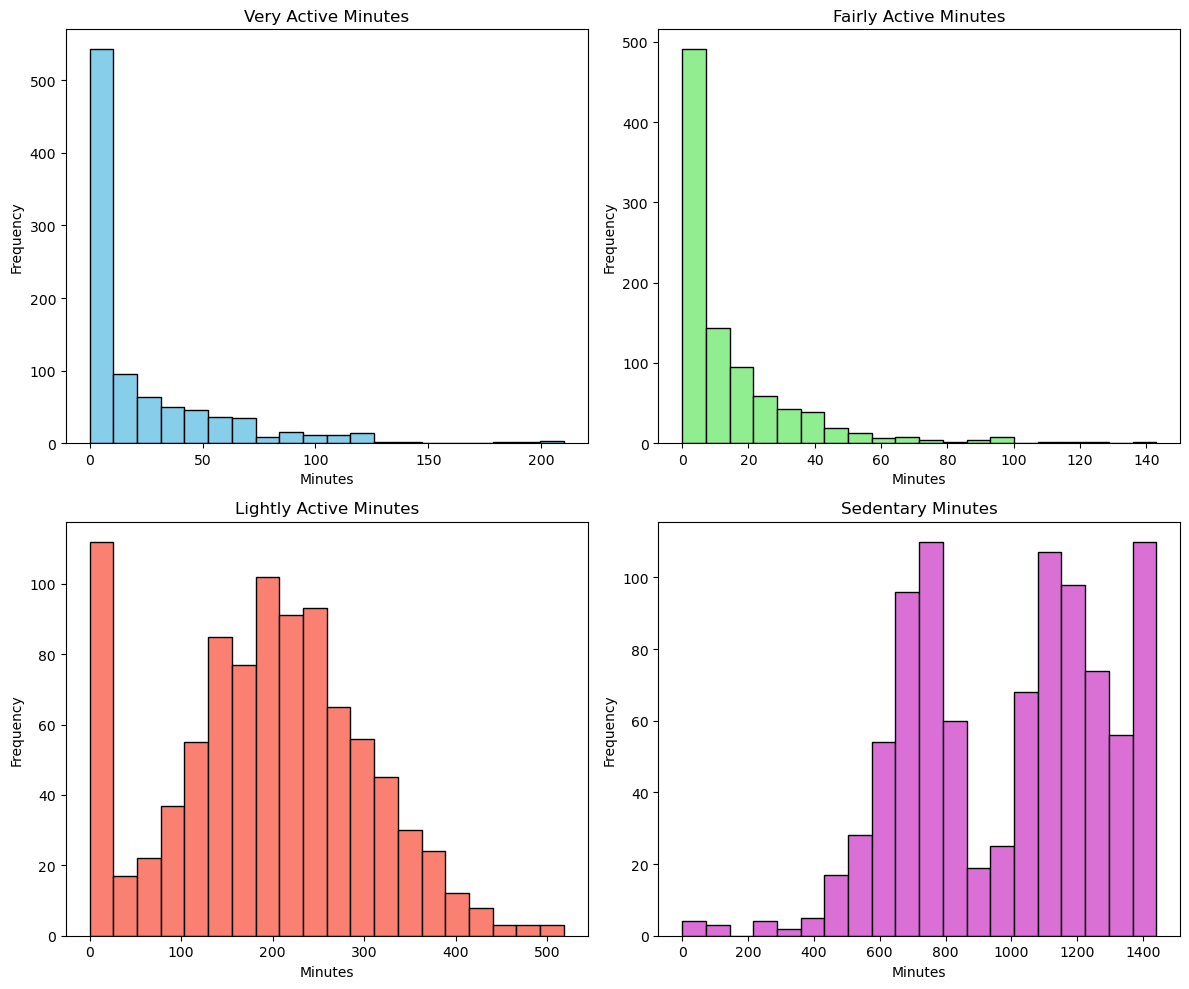

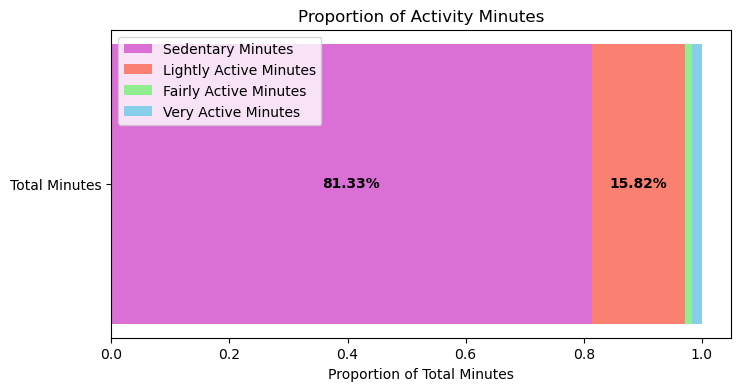

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

dailyActivity['VeryActiveMinutes'].plot.hist(ax=axes[0, 0], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Very Active Minutes')
axes[0, 0].set_xlabel('Minutes')
axes[0, 0].set_ylabel('Frequency')

dailyActivity['FairlyActiveMinutes'].plot.hist(ax=axes[0, 1], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Fairly Active Minutes')
axes[0, 1].set_xlabel('Minutes')
axes[0, 1].set_ylabel('Frequency')

dailyActivity['LightlyActiveMinutes'].plot.hist(ax=axes[1, 0], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Lightly Active Minutes')
axes[1, 0].set_xlabel('Minutes')
axes[1, 0].set_ylabel('Frequency')

dailyActivity['SedentaryMinutes'].plot.hist(ax=axes[1, 1], bins=20, color='orchid', edgecolor='black')
axes[1, 1].set_title('Sedentary Minutes')
axes[1, 1].set_xlabel('Minutes')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#show common proportion of how much time of intensity people dedicate to each category
def single_stack_graph_minutes(dailyActivities):
    sumSedentary=dailyActivities["SedentaryMinutes"].sum()
    sumLightly=dailyActivities["LightlyActiveMinutes"].sum()
    sumFairly=dailyActivities["FairlyActiveMinutes"].sum()
    sumVery=dailyActivities["VeryActiveMinutes"].sum()
    
    total = sumSedentary + sumLightly + sumFairly + sumVery
    proportions = [sumSedentary / total, sumLightly / total, sumFairly / total, sumVery / total]
    labels = ['Sedentary Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Very Active Minutes']
    colors = ['orchid', 'salmon', 'lightgreen', 'skyblue']

    fig, ax = plt.subplots(figsize=(8, 4))

    bars = ax.barh(['Total Minutes'], [proportions[0]], color=colors[0], label=labels[0])
    bars1 = ax.barh(['Total Minutes'], [proportions[1]], left=[proportions[0]], color=colors[1], label=labels[1])
    bars2 = ax.barh(['Total Minutes'], [proportions[2]], left=[proportions[0] + proportions[1]], color=colors[2], label=labels[2])
    bars3 = ax.barh(['Total Minutes'], [proportions[3]], left=[proportions[0] + proportions[1] + proportions[2]], color=colors[3], label=labels[3])

    # Adding labels
    for bars in [bars, bars1]:
        for bar in bars:
            width = bar.get_width()
            ax.text(bar.get_x() + width / 2, bar.get_y() + bar.get_height() / 2,
                    f'{width:.2%}', ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.xlabel('Proportion of Total Minutes')
    plt.title('Proportion of Activity Minutes')
    plt.legend()
    plt.show()

# Assuming df is the DataFrame loaded from the CSV file
single_stack_graph_minutes(dailyActivity)
    

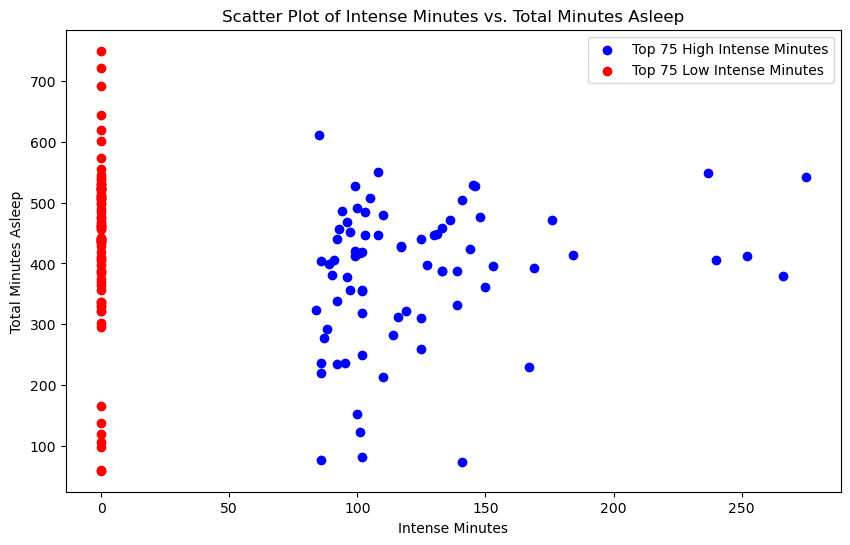

In [108]:
#top 25% best and worst of very+fairly minutes, compare time slept and time required to sleep?
def merge_dailyIntensities_sleepDay(dailyActivity: pd.DataFrame, sleepday: pd.DataFrame): 
    #https://stackoverflow.com/questions/58272872/pandas-top-n-values-in-each-group
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyActivity,left_on = ["Id","Date"],right_on = ["Id","ActivityDate"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    df["IntenseMinutes"] = df["VeryActiveMinutes"]+df["FairlyActiveMinutes"]
    top75= df.groupby("Id").IntenseMinutes.nlargest(75).reset_index()
    top75high = df.loc[top75['level_1']].nlargest(75, 'IntenseMinutes')
    top75low = df.loc[top75['level_1']].nsmallest(75, 'IntenseMinutes')
    return top75high, top75low

top75high, top75low = merge_dailyIntensities_sleepDay(dailyActivity, sleepday)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top75high['IntenseMinutes'], top75high['TotalMinutesAsleep'], color='blue', label='Top 75 High Intense Minutes')
plt.scatter(top75low['IntenseMinutes'], top75low['TotalMinutesAsleep'], color='red', label='Top 75 Low Intense Minutes')
plt.xlabel('Intense Minutes')
plt.ylabel('Total Minutes Asleep')
plt.title('Scatter Plot of Intense Minutes vs. Total Minutes Asleep')
plt.legend()
plt.show()



In [ ]:
#merge sleep day and daily intensities
def merge_dailyIntensities_sleepDay(dailyIntensities: pd.DataFrame, sleepday: pd.DataFrame): 
    sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])
    sleepday["Date"] = sleepday["SleepDay"].dt.strftime("%-m/%-d/%Y")
    df = pd.merge(sleepday,dailyIntensities,left_on = ["Id","Date"],right_on = ["Id","ActivityDay"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

def plot_time_to_fall_asleep_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TimeToFallAsleep")
        plt.title(f'Time to Fall Asleep vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time to Fall Asleep (minutes)')
    
    plt.tight_layout()
    plt.show()
    
def plot_time_slept_vs_activity_minutes(df: pd.DataFrame):
    activity_columns = ["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes"]
    plt.figure(figsize=(14, 10))
    
    for i, activity in enumerate(activity_columns, 1):
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=activity, y="TotalMinutesAsleep",color=["red"])
        plt.title(f'Time Slept vs. {activity}')
        plt.xlabel(activity)
        plt.ylabel('Time Slept (minutes)')
    
    plt.tight_layout()
    plt.show()

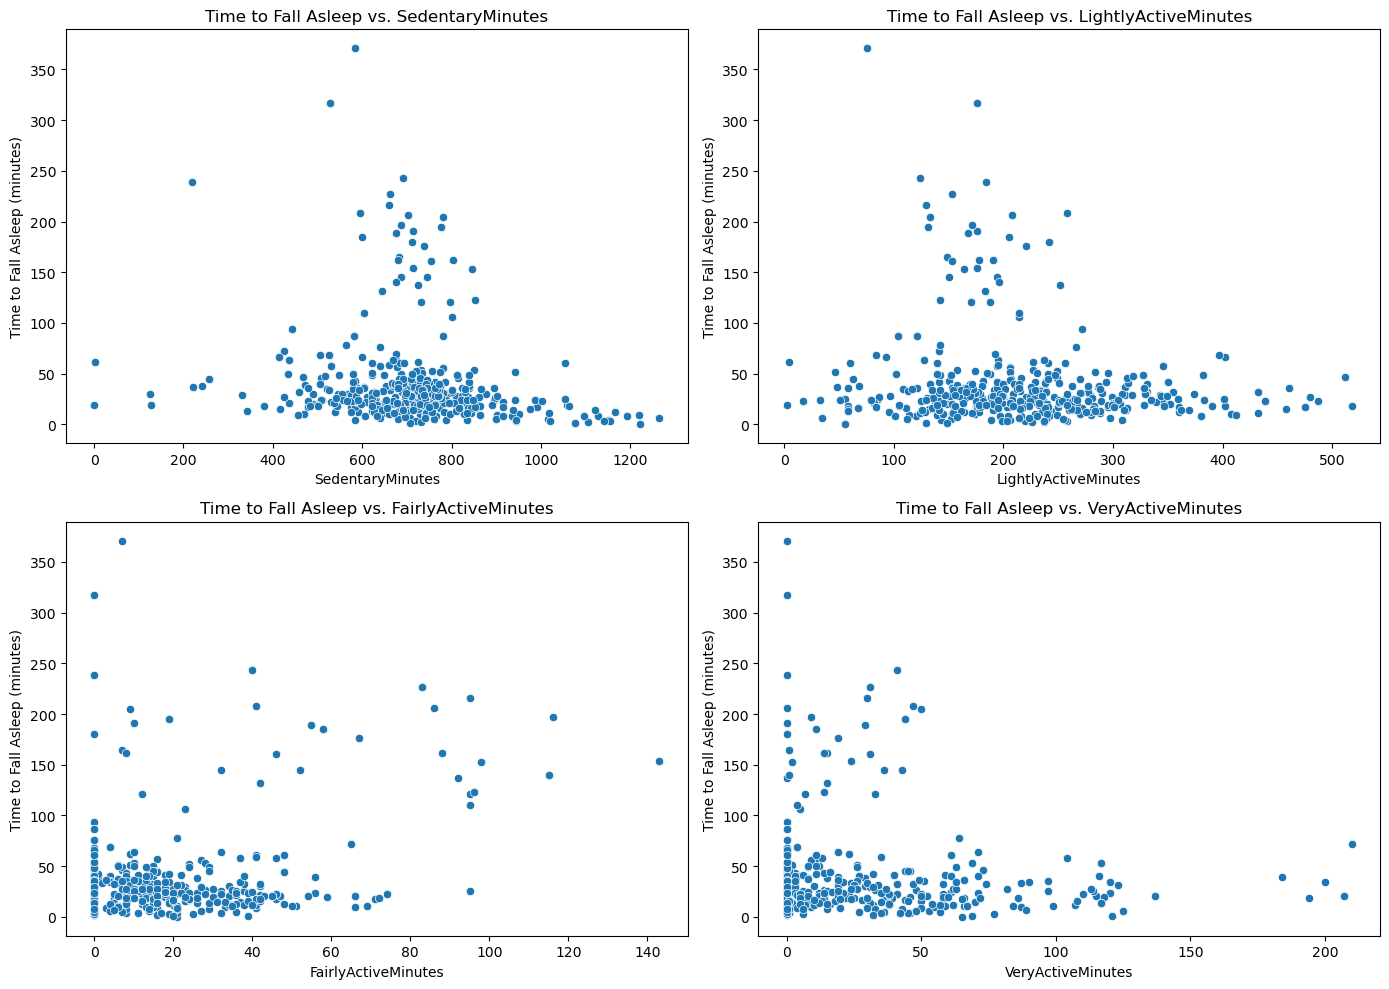

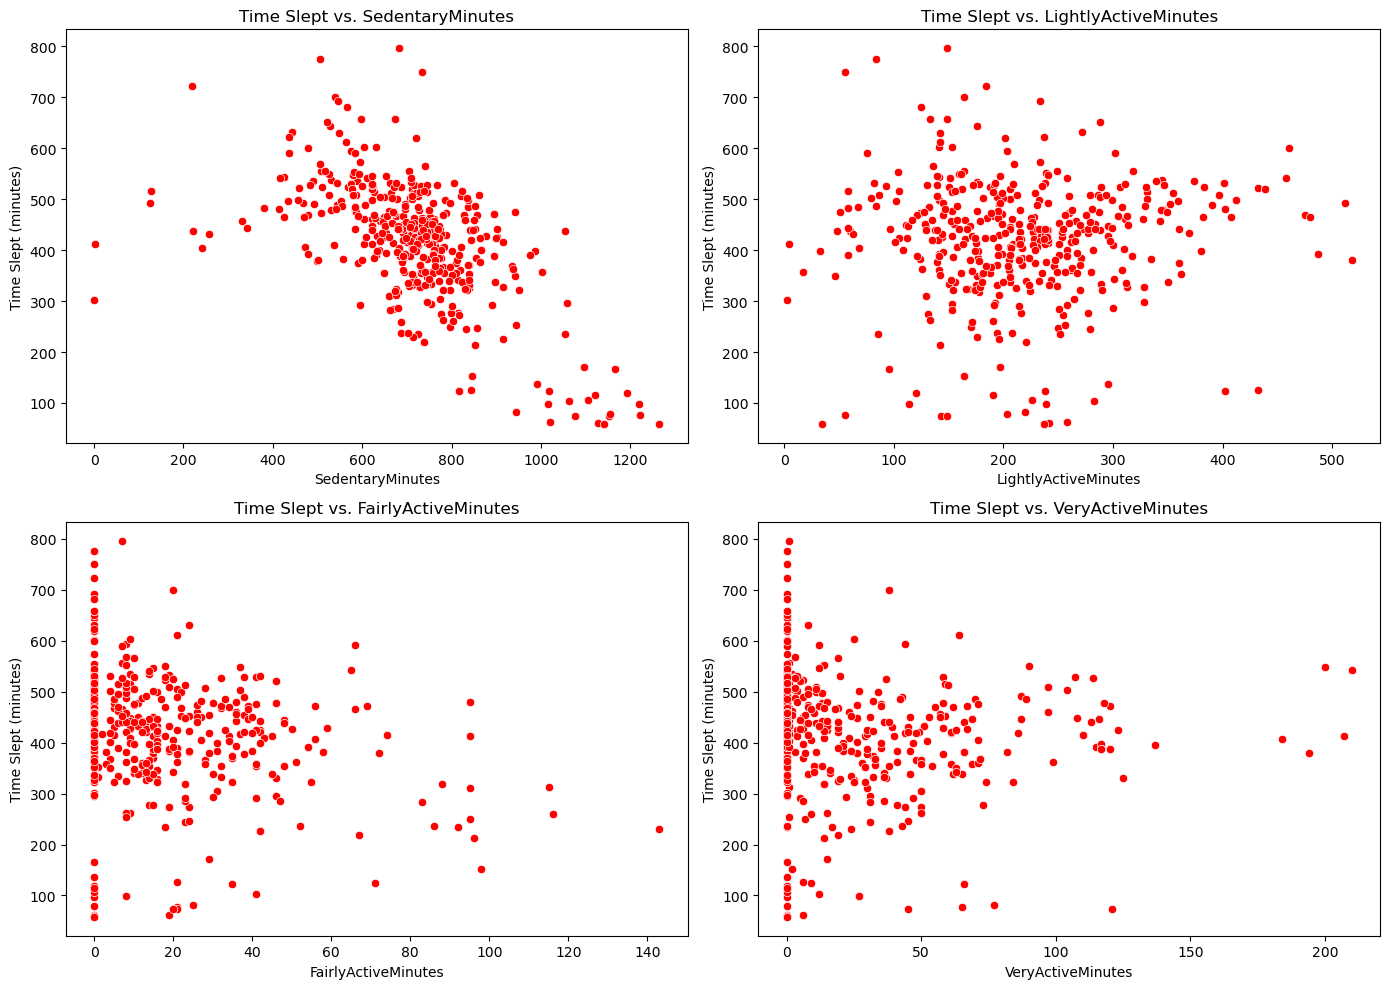

In [20]:
b=merge_dailyIntensities_sleepDay(dailyIntensities, sleepday)

plot_time_to_fall_asleep_vs_activity_minutes(b)
plot_time_slept_vs_activity_minutes(b)

## iii) BMI

In [14]:
def merge_bmi_sleepDay(weightLog: pd.DataFrame, sleepday: pd.DataFrame):
    weightLog["Date1"] = weightLog["Date"].str[0:9]
    sleepday["Date1"] = sleepday["SleepDay"].str[0:9]
    df = pd.merge(sleepday,weightLog,left_on = ["Id","Date1"],right_on = ["Id","Date1"])
    df["TimeToFallAsleep"] = df["TotalTimeInBed"]-df["TotalMinutesAsleep"]
    return df

def plot_time_to_sleep_vs_bmi(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='BMI', y='TimeToFallAsleep')
    plt.title('Time to Fall Asleep vs. BMI')
    plt.xlabel('BMI')
    plt.ylabel('Time to Fall Asleep (minutes)')
    plt.show()


In [15]:
c = merge_dailyCal_sleepDay(weightLog,sleepday)
plot_time_to_sleep_vs_bmi(c)

KeyError: 'ActivityDay'

In [13]:
#find top 15 persons with highest BMI on average and look at their BMI, average activity, average Calorie
#do the same for everything but also for total time slept
#list bmi for their corresponding last record